In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
np.random.seed(42)

raw = pd.read_csv("/content/seattle-weather.csv", parse_dates=["date"])

df = pd.DataFrame({
    "Humidity": np.clip(50 + raw["precipitation"], 0, 100),
    "WindSpeed": raw["wind"],
    "Pressure": 1013 + np.random.randint(-15, 15, raw.shape[0]),
})

df["Temperature"] = (raw["temp_max"] + raw["temp_min"]) / 2

df.head()


,Humidity,WindSpeed,Pressure,Temperature
0,50.0,4.7,1004,8.90
1,60.9,4.5,1017,6.70
2,50.8,2.3,1026,9.45
3,70.3,4.7,1012,8.90
4,51.3,6.1,1008,5.85


In [ ]:
X = df[["Humidity", "WindSpeed", "Pressure"]]
y = df["Temperature"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


MAE: 5.114884806769568
MSE: 36.1850399330358
RMSE: 6.015400230494709


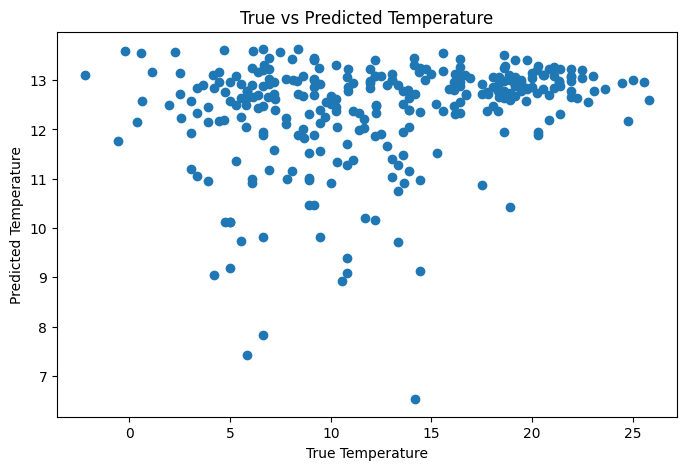

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("True Temperature")
plt.ylabel("Predicted Temperature")
plt.title("True vs Predicted Temperature")
plt.show()


In [ ]:
new_data = pd.DataFrame({
    "Humidity": [70],
    "WindSpeed": [12],
    "Pressure": [1010]
})

temp_pred = model.predict(new_data)

print(" Predicted Temperature:", temp_pred[0])


 Predicted Temperature: 7.032497915194256
